# Understanding the Kernel Trick in Support Vector Machines (SVMs)

Often we encounter datasets that are linearly inseparable for classification. For linearly separable classes by using an SVM, it is easy to add a hyperplane that classifies the data. However, for linearly inseparable data, a transformation to a higher dimension will help map the data to a linearly separable space. Sometimes, this mapping can be from $R^n \to R^\inf$. One such cool ways to map the data is by using functions called kernels. Here we shall look at an example in 2-dimensions when mapped to 3-dimensions will help classify the data with a high accuracy.[1] Let us create a 2-D circles dataset.

<img src="../../../images/kernel-trick.png" style="width:45vw">

### Exercise

Write code to get a linearly inseparable data.


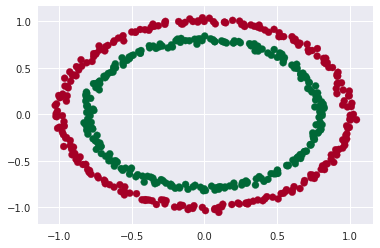

In [56]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from mpl_toolkits.mplot3d import Axes3D 
  
cm = plt.get_cmap("RdYlGn")

# generating data 
X, y = make_circles(n_samples = 500, noise = 0.02) 
  
# visualizing data 
plt.scatter(X[:, 0], X[:, 1], c = y, marker = 'o', cmap=cm) 
plt.show() 

### Solution

Just run the code above to visualize the linearly insearable data.


## Accuracy of the SVM with the linear kernel

Let us compute the accuracy of the SVM with the linear kernel.

Let us fit a linear SVM to our dataset. Please note that we are using classification algorithm to demostrate non-linear kernel here.

In [47]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)
y_hat = svm_linear.predict(X)
print(accuracy_score(y_hat, y))

0.51


### Solution

Just run the above code

We can see that the accuracy of the linear SVM is poor. Let us apply the rbf kernel to the classifier.

## SVM with Radial Basis Function(RBF) Kernel

RBF is defined as $K(x,y) = e^{-(\frac{\lVert x - y \rVert^2}{2\sigma^2})}$. The function weighs points around x in the neighborhood higher than those points away from x. Let us use this function and measure the score.

In [48]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X, y)
y_hat = rbf_svm.predict(X)
print(accuracy_score(y_hat, y))

1.0


### Solution

Just hit run

## How does the Kernel work

Here we see that the using the kernel substantially increased the accuracy. How does it work? To visualize the result, let us try use a custom transformation where we increase the dimensions of 2d points to 3d. For this purpose, let us define a transformation function,

$$\phi(x, y) = (x, y, x^2 + y^2)$$

Note that the above function transforms the space from $R^2 \to R^3$. In other terms,


$$Z = X^2 + Y^2$$

Thus, projecting the 2-dimensional data into 3-dimensional space. The first dimension representing the feature X, second representing Y and third representing Z (which, mathematically, is equal to the radius of the circle of which the point (x, y) is a part of). 


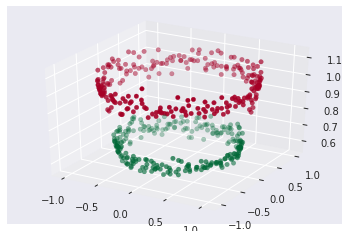

In [57]:
#Z = X[:, 0]**2 + X[:, 1]**2
#trans_X = np.c_[X, Z]  

cm = plt.get_cmap("RdYlGn")
X1 = X[:, 0].reshape((-1, 1)) 
X2 = X[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
X = np.hstack((X, X3)) 
  
# visualizing data in higher dimension 
fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d') 
axes.scatter(X1, X2, X1**2 + X2**2, c = y, marker='o', depthshade = True, cmap=cm) 
plt.show() 

## Solution

```python
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)
y_hat = svm.predict(X)
print(accuracy_score(y_hat, y))
```

## Visualizing the Linear Hyperplane

Now that we have included the inner working on the rbf kernel with custom code

Let us visualize the hyperplane in this data after projecting it into 3-d featurespace.


## References

1. https://web.stanford.edu/class/cs276a/handouts/svmreview.pdf

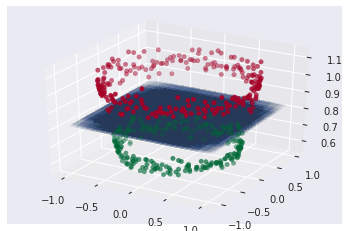

In [61]:
#Run the code below to vizualize the hyperplane in 3-d featurespace
w = svc.coef_ 
b = svc.intercept_ 

x1 = X[:, 0].reshape((-1, 1)) 
x2 = X[:, 1].reshape((-1, 1)) 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2]  

# visualizing data in higher dimension 
fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d') 
axes.scatter(X1, X2, X1**2 + X2**2, c = y, marker='o', depthshade = True, cmap=cm) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show() 



### Solution

Just run the code cell

## Use of Kernel in Regularization

Kernel ridge regression combines Ridge Regression with the kernel trick which we learnt in the above sections. It thus learns a linear function in the space induced by the respective kernel- for example polynomial. For non-linear kernels, this corresponds to a non-linear function in the original space.

For this we use KernelRidge from sklearn.

According to sklearn documentation, the model learned by KernelRidge is identical to support vector regression (SVR). However, different loss functions are used: KRR uses squared error loss while support vector regression uses -insensitive loss, both combined with l2 regularization.

```python
from sklearn.kernel_ridge import KernelRidge


clf = KernelRidge(alpha=1.0)
clf.fit(X, y) 

>>> KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
>>>      kernel_params=None)
```


In [85]:
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
X = rng.randn(n_samples, n_features)
y = rng.randn(1)[0]*X + rng.randn(1)[0] * X**2 


##Now let us do Kernel Ridge Regression
clf2 = KernelRidge(alpha=0.5)
clf2.fit(X, y) 
y_hat_krr = clf2.predict(X)
print('Kernel Ridge Regression MSE',mean_squared_error(y, y_hat_krr))

Kernel Ridge Regression MSE 0.2712425619208888


### Solution

Just hit run

